In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
import pandas as pd
df_tg = pd.read_excel("C:\\Users\\91990\Downloads\\DataSet2.xls")
df_tg

,Unnamed: 0,Glass Transition Temperature,SMILES String
0,0,279.0,C=CC(=O)OCc1ccccc1
1,1,383.0,C=CC(=O)Oc2ccc(c1ccccc1)cc2
2,2,219.0,CCCCOC(=O)C=C
3,3,250.0,CC(OC(=O)C=C)CC
4,4,345.0,C=CC(=O)Oc1ccccc1C(C)(C)C
...,...,...,...
804,608,498.5,c1ccc(NC(=O)c2ccc(OCCOc3ccc(C(=O)Nc4ccc5[nH]cn...
805,609,448.5,c1ccc(NC(=O)c2ccc(OCCOCCOc3ccc(C(=O)Nc4ccc5[nH...
806,610,428.5,c1ccc(NC(=O)c2ccc(OCCOCCOCCOc3ccc(C(=O)Nc4ccc5...
807,611,413.5,c1ccc(NC(=O)c2ccc(OCCOCCOCCOCCOc3ccc(C(=O)Nc4c...


In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles(df_tg['SMILES String'][0])
vals = Descriptors.CalcMolDescriptors(m)
vals

{'MaxAbsEStateIndex': 10.64484552154195,
 'MaxEStateIndex': 10.64484552154195,
 'MinAbsEStateIndex': 0.31120370370370365,
 'MinEStateIndex': -0.3899508692365823,
 'qed': 0.5010024065345234,
 'MolWt': 162.188,
 'HeavyAtomMolWt': 152.10799999999998,
 'ExactMolWt': 162.06807956,
 'NumValenceElectrons': 62,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.3299759053338003,
 'MinPartialCharge': -0.45767188565322603,
 'MaxAbsPartialCharge': 0.45767188565322603,
 'MinAbsPartialCharge': 0.3299759053338003,
 'FpDensityMorgan1': 1.4166666666666667,
 'FpDensityMorgan2': 2.0833333333333335,
 'FpDensityMorgan3': 2.6666666666666665,
 'BCUT2D_MWHI': 16.532066779439536,
 'BCUT2D_MWLOW': 10.222393127163302,
 'BCUT2D_CHGHI': 1.9482211038428312,
 'BCUT2D_CHGLO': -1.9984922980061979,
 'BCUT2D_LOGPHI': 1.9973477595721019,
 'BCUT2D_LOGPLOW': -1.9903269552629947,
 'BCUT2D_MRHI': 5.806288402508834,
 'BCUT2D_MRLOW': -0.1384763244587012,
 'AvgIpc': 2.156561497517203,
 'BalabanJ': 2.433681888348472,
 'BertzCT':

In [5]:
df_dictionary = pd.DataFrame(vals, index = [0])
#df_1 = pd.concat([df_tg, df_dictionary], ignore_index = True)
for i in range(1,809):
    x = Chem.MolFromSmiles(df_tg['SMILES String'][i])
    new_row = Descriptors.CalcMolDescriptors(x)
    df_dictionary = df_dictionary.append(new_row, ignore_index=True)
df_dictionary

[10:40:53] Explicit valence for atom # 10 Cl, 3, is greater than permitted
[10:41:03] Can't kekulize mol.  Unkekulized atoms: 22 23 24 27 30 31 32
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 29 36 37 40 41
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 36 37 38 39 40 47 48 51 52
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 34 35 38 39
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 35 36 37 38 39 46 47 50 51
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22 29 30 33 34
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 30 31 32 33 34 41 42 45 46
[10:41:12] Can't kekulize mol.  Unkekulized atoms: 23 24 25 28 29 30 31 32 33
[10:41:13] Can't kekulize mol.  Unkekulized atoms: 22 23 24 27 28 29 30 31 32
[10:41:13] Can't kekulize mol.  Unkekulized atoms: 15 16 17 20 21 22 23 24 25
[10:41:14] Can't kekulize mol.  Unkekulized atoms: 21 22 23 26 27 28 29 30 31
[10:41:14] Can't kekulize mol.  Unkekulized atoms: 15 16 17 20 21 22 23 2

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.644846,10.644846,0.311204,-0.389951,0.501002,162.188,152.108,162.068080,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.995845,10.995845,0.446795,-0.446795,0.453217,224.259,212.163,224.083730,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.346346,10.346346,0.330139,-0.330139,0.325717,128.171,116.075,128.083730,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10.440833,10.440833,0.009722,-0.343194,0.425150,128.171,116.075,128.083730,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.120108,11.120108,0.043608,-0.424352,0.420172,204.269,188.141,204.115030,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,12.549331,12.549331,0.183380,-0.216976,0.234890,492.535,468.343,492.179755,184.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
805,12.547205,12.547205,0.178355,-0.213093,0.180423,536.588,508.364,536.205970,202.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
806,12.551746,12.551746,0.175932,-0.211439,0.138604,580.641,548.385,580.232185,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
807,12.558383,12.558383,0.174733,-0.210781,0.107783,624.694,588.406,624.258399,238.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


In [7]:
desc_list = [n[0] for n in Descriptors._descList]
sc_desc = [i for i in desc_list if i.startswith('fr_')]
sc_desc

['fr_Al_COO',
 'fr_Al_OH',
 'fr_Al_OH_noTert',
 'fr_ArN',
 'fr_Ar_COO',
 'fr_Ar_N',
 'fr_Ar_NH',
 'fr_Ar_OH',
 'fr_COO',
 'fr_COO2',
 'fr_C_O',
 'fr_C_O_noCOO',
 'fr_C_S',
 'fr_HOCCN',
 'fr_Imine',
 'fr_NH0',
 'fr_NH1',
 'fr_NH2',
 'fr_N_O',
 'fr_Ndealkylation1',
 'fr_Ndealkylation2',
 'fr_Nhpyrrole',
 'fr_SH',
 'fr_aldehyde',
 'fr_alkyl_carbamate',
 'fr_alkyl_halide',
 'fr_allylic_oxid',
 'fr_amide',
 'fr_amidine',
 'fr_aniline',
 'fr_aryl_methyl',
 'fr_azide',
 'fr_azo',
 'fr_barbitur',
 'fr_benzene',
 'fr_benzodiazepine',
 'fr_bicyclic',
 'fr_diazo',
 'fr_dihydropyridine',
 'fr_epoxide',
 'fr_ester',
 'fr_ether',
 'fr_furan',
 'fr_guanido',
 'fr_halogen',
 'fr_hdrzine',
 'fr_hdrzone',
 'fr_imidazole',
 'fr_imide',
 'fr_isocyan',
 'fr_isothiocyan',
 'fr_ketone',
 'fr_ketone_Topliss',
 'fr_lactam',
 'fr_lactone',
 'fr_methoxy',
 'fr_morpholine',
 'fr_nitrile',
 'fr_nitro',
 'fr_nitro_arom',
 'fr_nitro_arom_nonortho',
 'fr_nitroso',
 'fr_oxazole',
 'fr_oxime',
 'fr_para_hydroxylation',

In [73]:
df_fin = pd.concat([df_tg, df_dictionary], axis = 1)
df_fin = df_fin.drop(['Unnamed: 0'], axis=1)
df_fin = df_fin.drop(sc_desc, axis = 1)
df_fin

,Glass Transition Temperature,SMILES String,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,279.0,C=CC(=O)OCc1ccccc1,10.644846,10.644846,0.311204,-0.389951,0.501002,162.188,152.108,162.068080,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.9158,46.4350
1,383.0,C=CC(=O)Oc2ccc(c1ccccc1)cc2,10.995845,10.995845,0.446795,-0.446795,0.453217,224.259,212.163,224.083730,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,3.4450,67.7100
2,219.0,CCCCOC(=O)C=C,10.346346,10.346346,0.330139,-0.330139,0.325717,128.171,116.075,128.083730,...,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,1.5157,36.0640
3,250.0,CC(OC(=O)C=C)CC,10.440833,10.440833,0.009722,-0.343194,0.425150,128.171,116.075,128.083730,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,1.5141,36.0420
4,345.0,C=CC(=O)Oc1ccccc1C(C)(C)C,11.120108,11.120108,0.043608,-0.424352,0.420172,204.269,188.141,204.115030,...,2.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0755,60.9740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,498.5,c1ccc(NC(=O)c2ccc(OCCOc3ccc(C(=O)Nc4ccc5[nH]cn...,12.549331,12.549331,0.183380,-0.216976,0.234890,492.535,468.343,492.179755,...,5.0,3.0,8.0,9.0,0.0,0.0,0.0,5.0,5.5253,142.3161
805,448.5,c1ccc(NC(=O)c2ccc(OCCOCCOc3ccc(C(=O)Nc4ccc5[nH...,12.547205,12.547205,0.178355,-0.213093,0.180423,536.588,508.364,536.205970,...,6.0,3.0,9.0,12.0,0.0,0.0,0.0,5.0,5.5419,153.1351
806,428.5,c1ccc(NC(=O)c2ccc(OCCOCCOCCOc3ccc(C(=O)Nc4ccc5...,12.551746,12.551746,0.175932,-0.211439,0.138604,580.641,548.385,580.232185,...,7.0,3.0,10.0,15.0,0.0,0.0,0.0,5.0,5.5585,163.9541
807,413.5,c1ccc(NC(=O)c2ccc(OCCOCCOCCOCCOc3ccc(C(=O)Nc4c...,12.558383,12.558383,0.174733,-0.210781,0.107783,624.694,588.406,624.258399,...,8.0,3.0,11.0,18.0,0.0,0.0,0.0,5.0,5.5751,174.7731


In [74]:
df_fin = df_fin.dropna()
df_fin

,Glass Transition Temperature,SMILES String,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,279.0,C=CC(=O)OCc1ccccc1,10.644846,10.644846,0.311204,-0.389951,0.501002,162.188,152.108,162.068080,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.9158,46.4350
1,383.0,C=CC(=O)Oc2ccc(c1ccccc1)cc2,10.995845,10.995845,0.446795,-0.446795,0.453217,224.259,212.163,224.083730,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,3.4450,67.7100
2,219.0,CCCCOC(=O)C=C,10.346346,10.346346,0.330139,-0.330139,0.325717,128.171,116.075,128.083730,...,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,1.5157,36.0640
3,250.0,CC(OC(=O)C=C)CC,10.440833,10.440833,0.009722,-0.343194,0.425150,128.171,116.075,128.083730,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,1.5141,36.0420
4,345.0,C=CC(=O)Oc1ccccc1C(C)(C)C,11.120108,11.120108,0.043608,-0.424352,0.420172,204.269,188.141,204.115030,...,2.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0755,60.9740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,498.5,c1ccc(NC(=O)c2ccc(OCCOc3ccc(C(=O)Nc4ccc5[nH]cn...,12.549331,12.549331,0.183380,-0.216976,0.234890,492.535,468.343,492.179755,...,5.0,3.0,8.0,9.0,0.0,0.0,0.0,5.0,5.5253,142.3161
805,448.5,c1ccc(NC(=O)c2ccc(OCCOCCOc3ccc(C(=O)Nc4ccc5[nH...,12.547205,12.547205,0.178355,-0.213093,0.180423,536.588,508.364,536.205970,...,6.0,3.0,9.0,12.0,0.0,0.0,0.0,5.0,5.5419,153.1351
806,428.5,c1ccc(NC(=O)c2ccc(OCCOCCOCCOc3ccc(C(=O)Nc4ccc5...,12.551746,12.551746,0.175932,-0.211439,0.138604,580.641,548.385,580.232185,...,7.0,3.0,10.0,15.0,0.0,0.0,0.0,5.0,5.5585,163.9541
807,413.5,c1ccc(NC(=O)c2ccc(OCCOCCOCCOCCOc3ccc(C(=O)Nc4c...,12.558383,12.558383,0.174733,-0.210781,0.107783,624.694,588.406,624.258399,...,8.0,3.0,11.0,18.0,0.0,0.0,0.0,5.0,5.5751,174.7731


In [53]:
(df_fin['NumRadicalElectrons'] == 0).all()

False

In [75]:
scam = df_fin[df_fin.columns[2:10]]
scam

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt
0,10.644846,10.644846,0.311204,-0.389951,0.501002,162.188,152.108,162.068080
1,10.995845,10.995845,0.446795,-0.446795,0.453217,224.259,212.163,224.083730
2,10.346346,10.346346,0.330139,-0.330139,0.325717,128.171,116.075,128.083730
3,10.440833,10.440833,0.009722,-0.343194,0.425150,128.171,116.075,128.083730
4,11.120108,11.120108,0.043608,-0.424352,0.420172,204.269,188.141,204.115030
...,...,...,...,...,...,...,...,...
804,12.549331,12.549331,0.183380,-0.216976,0.234890,492.535,468.343,492.179755
805,12.547205,12.547205,0.178355,-0.213093,0.180423,536.588,508.364,536.205970
806,12.551746,12.551746,0.175932,-0.211439,0.138604,580.641,548.385,580.232185
807,12.558383,12.558383,0.174733,-0.210781,0.107783,624.694,588.406,624.258399


In [269]:
X = df_fin[df_fin.columns[2:]]
y = df_fin[df_fin.columns[0]]
n_c = X.shape[1]

In [270]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [27]:
from keras import regularizers

In [282]:
import tensorflow as tf
def regression_model():
    model = Sequential()
    model.add(Dense(69, activation='relu', input_shape=(n_c,)))
    model.add(Dropout(0.1))
    model.add(Dense(20, activation ='relu', kernel_regularizer=regularizers.l2(0.01)))
    #model.add(Dense(5, activation ='relu'))
    #model.add(Dense(20, activation ='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
    lr = 1e-3
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
    model.compile(optimizer = optimizer, loss='mean_squared_error')
    return model

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, shuffle=True)

In [284]:
X_train

array([[-0.17474014, -0.17474014, -0.72828461, ..., -0.6577435 ,
        -0.86786795, -0.5368678 ],
       [ 0.41146844,  0.41146844, -0.6421161 , ..., -0.33698203,
        -0.62191082,  0.25135148],
       [-0.05000022, -0.05000022, -0.65899728, ..., -0.6577435 ,
        -0.51216173, -0.4546463 ],
       ...,
       [-0.67400699, -0.67400699, -0.47091401, ..., -0.97850497,
        -0.78469718, -1.1669398 ],
       [ 1.49093041,  1.49093041, -0.72463506, ...,  0.62530239,
         1.75599483,  1.16433625],
       [ 0.05025654,  0.05025654, -0.23320865, ..., -0.6577435 ,
        -0.27830264, -0.31630708]])

In [285]:
model = regression_model()
trial_fit = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.01)

Epoch 1/200
20/20 [==============================] - 1s 9ms/step - loss: 173820.3906 - val_loss: 113681.0391
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 168547.5312 - val_loss: 107618.0469
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 157066.3281 - val_loss: 94664.4219
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 135737.5469 - val_loss: 73792.0547
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 107104.5078 - val_loss: 47586.9414
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 76988.4219 - val_loss: 25413.3496
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 57389.9062 - val_loss: 15757.6973
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 50149.8477 - val_loss: 13276.5674
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 46998.0078 - val_loss: 12004.6641
Epoch 10/200
20/20 [==========

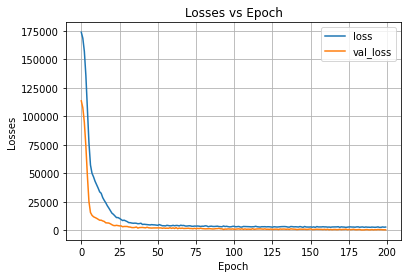

In [286]:
plt.figure()
plt.plot(trial_fit.history['loss'], label='loss')
plt.plot(trial_fit.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [287]:
pr = model.predict(X_train)

20/20 [==============================] - 0s 892us/step


0.9379793046884111


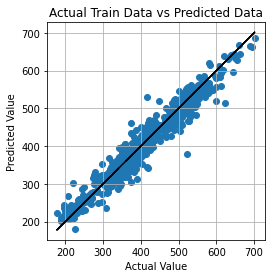

In [288]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_train, pr)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(y_train, y_train, 'k-')
plt.grid()

print(r2_score(y_train, pr))

In [289]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 997us/step


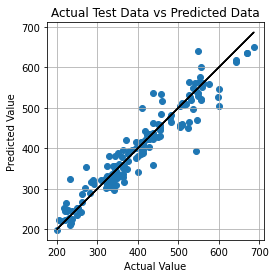

In [290]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_test, predictions)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(y_test, y_test, 'k-')
plt.grid()

In [291]:
print(r2_score(y_test, predictions))

0.9085112666024302


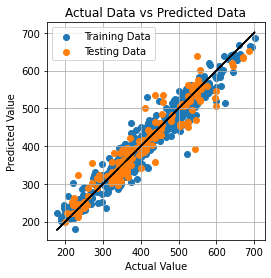

In [292]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_train, pr, label = 'Training Data')
plt.scatter(y_test, predictions, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(y_train, y_train, 'k-')
plt.grid()